<a href="https://colab.research.google.com/github/BaraahAbuAbadi/Loan--Acceptance-Prediction/blob/main/Loan_Acceptance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science Lifecycle
© 2024, Zaka AI, Inc. All Rights Reserved.

---
##Case Study: Loan Status
**Objective:**
In this exercise, we will explore a dataset of Loan data with the below info. We will try later to predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

# 1. Import necessary python modules (libraries)
<br>
We will need the following libraries:

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib & seaborn — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models. We will need from it the following functions: LabelEncoder, train_test_split, LogisticRegression, and accuracy_score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2. Read & visualize data
To load the data to our code, we use pandas module, more specifically, the read_csv function.

Combine the two dataset in order to apply the same preprocessing steps in both dataframes
Don't forget to print the head of your dataset to get a better insight into it.

In [2]:



# !git clone https://github.com/BaraahAbuAbadi/Loan--Acceptance-Prediction
# %cd Loan-Acceptance-Prediction/train & test data/
# test_data = pd.read_csv('test.csv')
# train_data = pd.read_csv('train.csv')

# df = pd.concat([train_data, test_data], ignore_index=True)

# print(df.head())

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df = pd.concat([df_train, df_test], ignore_index=True)

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# 3. Exploratory Data Analysis


In [3]:
num_rows, num_columns = df.shape

# Print the results
print(f"Number of rows: {num_rows}, and Number of columns: {num_columns}")


Number of rows: 614, and Number of columns: 13




```
# This is formatted as code
```

Start by getting the number of rows and the

*   List item

*   List item

*   List item

*   List item
*   List item


*   List item


*   List item


*   List item

number of columns that you have in your dataset

In [4]:
print(f"Number of columns: {num_columns}")
#df.shape

Number of columns: 13


##### Use the function info(), to check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Gender: 13 missing values
Married: 3 missing values
Dependents: 15 missing values
Self_Employed: 32 missing values
LoanAmount: 22 missing values
Loan_Amount_Term: 14 missing values
Credit_History: 50 missing values **Where** did you find some missing values?     

##### Use the function describe(), to check the following  values for each numerical feature (column)
- mean
- standard deviation
- maximum
- minimum


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Print the unique values of the variable Credit_History

In [7]:
np.sort(df.Credit_History.unique())

array([ 0.,  1., nan])

Do the same with the variable Loan_Amount_Term

In [8]:
np.sort(df.Loan_Amount_Term.unique())

array([ 12.,  36.,  60.,  84., 120., 180., 240., 300., 360., 480.,  nan])

##### Use the function describe(include='o'), to check the following  values for each categorical feature:
* count
* unique
* top
* freq


In [9]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Interpret the results you obtained for the variable Gender

**[Count: There are 601 non-missing values, which means some entries for Gender are missing, as the total number of records in the dataset is 614.
Unique: There are 2 unique values, likely corresponding to categories such as "Male" and "Female."
Top: The most frequent category is "Male."
Freq: "Male" appears 489 times in the dataset, indicating a majority of applicants are male.]**

# This is formatted as code
```



Compute the frequency for each unique value in the categorical feature specified in the code cells below

In [10]:
df['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


In [11]:
df['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


Create a new dataframe removeNA_df, where you remove the nulls existing in the original dataframe. This is only for being able to visualize distributions. In a later step, we will be focusing on cleaning our original dataset in a better way

In [12]:
removeNA_df = df.dropna()
#print(removeNA_df.shape)

Plot the distribution and the boxplot for the variable 'LoanAmount'

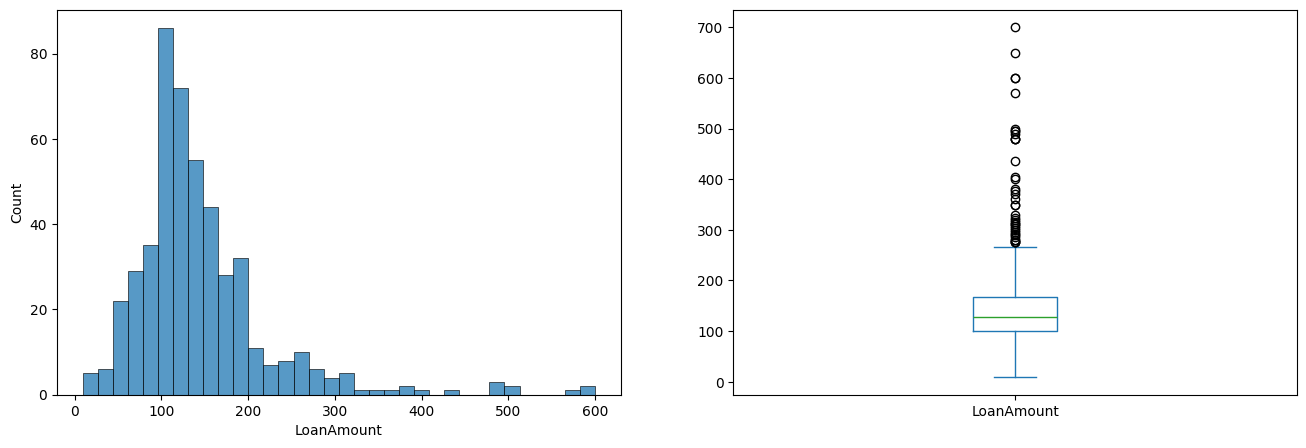

In [16]:
plt.figure(1)
plt.subplot(121)
sns.histplot(removeNA_df['LoanAmount'])

plt.subplot(122)
df['LoanAmount'].plot.box(figsize= (16,5))


plt.show()

* Is there any outlier?
* Is the data skewed?

**[Share your Zaka here]Yes, there are outliers, as shown in the Boxplot..there are individual points......Yes, it is skewed as shown on the  histogram plot. And as shown in thw boxplot==> the median line is not in the middle bold text**

Do the same for the variable 'ApplicantIncome'

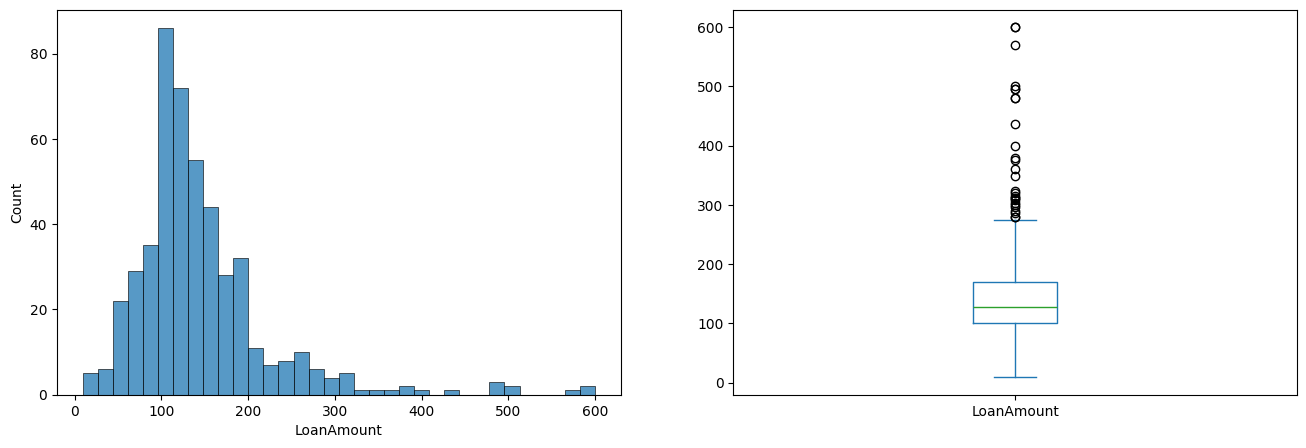

In [17]:
plt.figure(1)
plt.subplot(121)
sns.histplot(removeNA_df['LoanAmount'])  # Use sns.histplot for subplots

plt.subplot(122)
removeNA_df['LoanAmount'].plot.box(figsize=(16, 5))  # Ensure the same DataFrame is used

plt.show()

* Is there any outlier?
* Is the data skewed?

**[Share your Zaka here]Yes, there are outliers, as shown in the Boxplot..there are individual points......Yes, it is skewed as shown on the histogram plot. And as shown in thw boxplot==> the median line is not in the middle bold text**

Do the same for 'CoapplicantIncome'

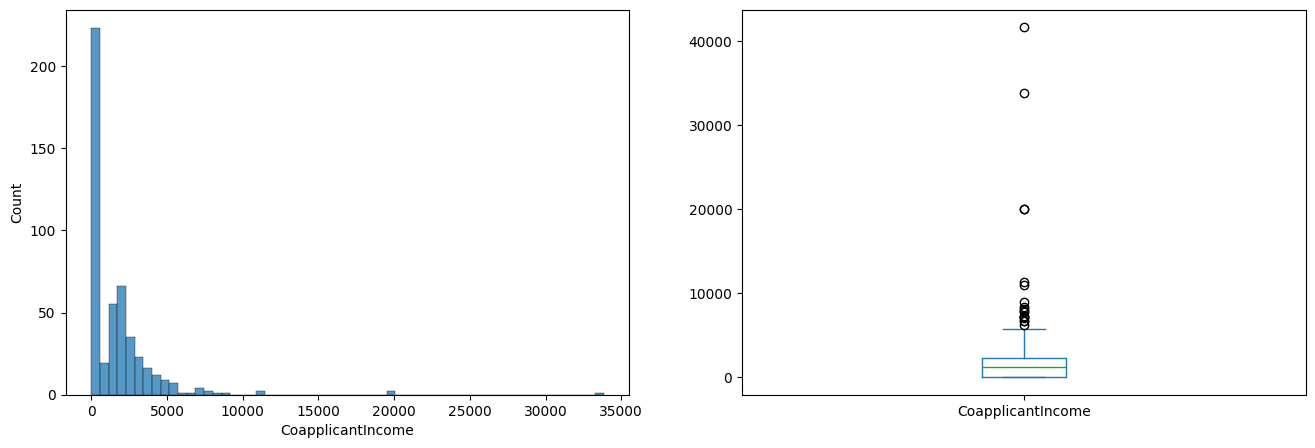

In [18]:
plt.figure(1)
plt.subplot(121)
sns.histplot(removeNA_df['CoapplicantIncome'])

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize= (16,5))

plt.show()

**[Share your Zaka here]Yes, there are outliers, as shown in the Boxplot..there are individual points......Yes, it is skewed as shown on the histogram plot. And as shown in thw boxplot==> the median line is not in the middle bold text**

Do the same for 'Loan_Amount_Term'

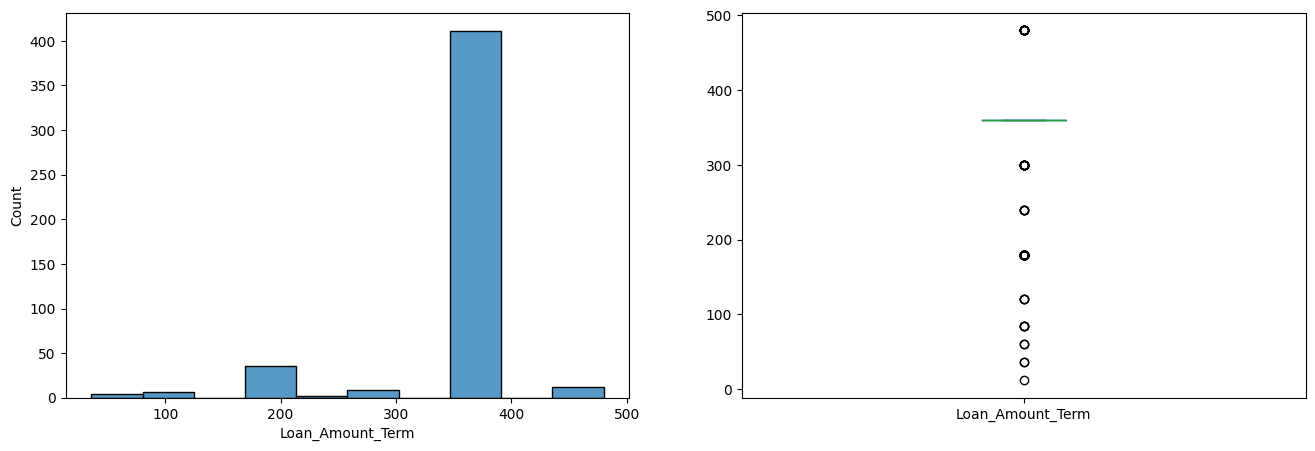

In [19]:
plt.figure(1)
plt.subplot(121)
sns.histplot(removeNA_df['Loan_Amount_Term'])

plt.subplot(122)
df['Loan_Amount_Term'].plot.box(figsize= (16,5))

plt.show()

What do you think about outliers in this case?

**[There are outliers]**

Plot the value_counts for 'Loan_Amount_term'

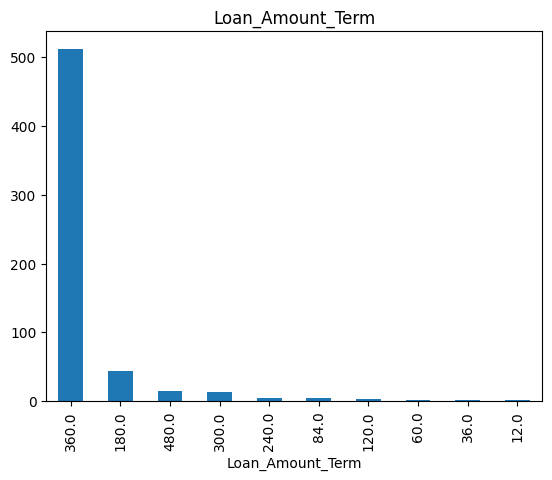

In [20]:
df['Loan_Amount_Term'].value_counts().plot.bar(title= 'Loan_Amount_Term')
plt.show()

Do the same for the categorical variables you have ('Dependants', 'Education', etc), using a subplot of size 4 by 2

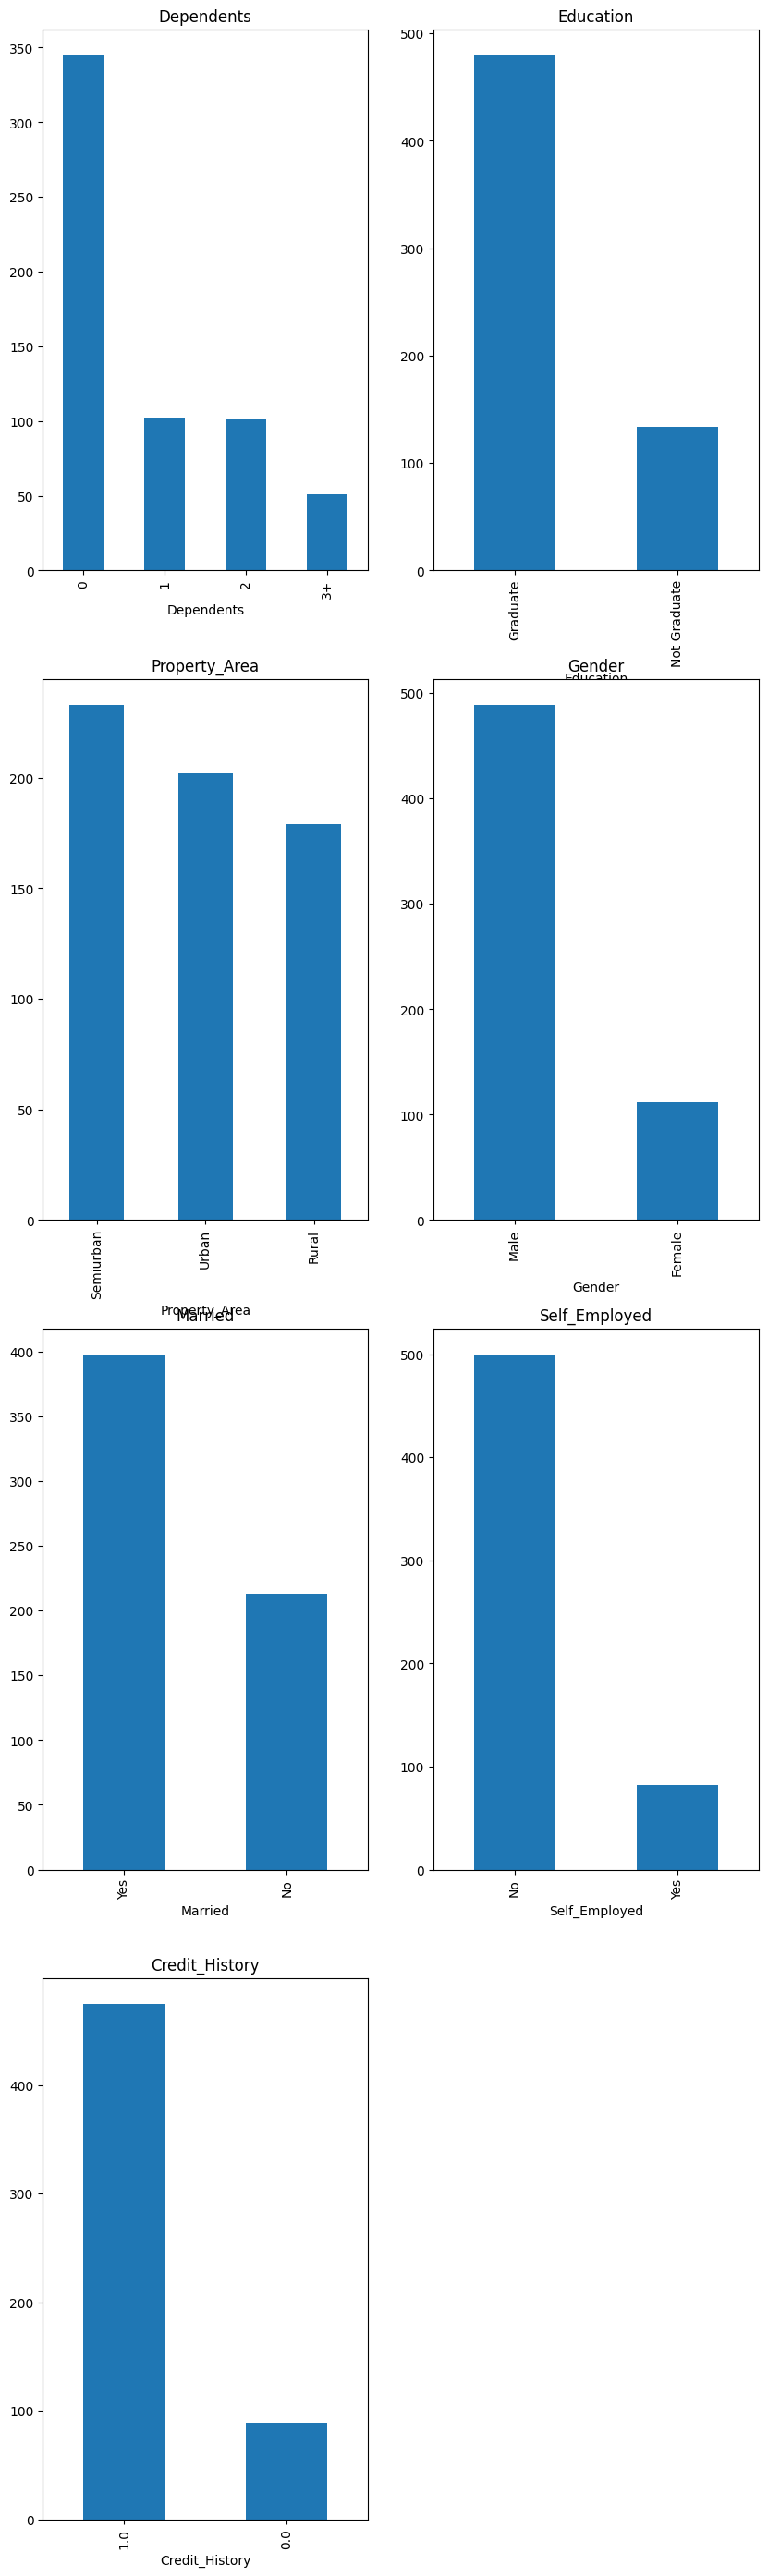

In [21]:
plt.figure(1)

plt.subplot(421)
df['Dependents'].value_counts().plot.bar(figsize= (10,35), title= 'Dependents')

plt.subplot(422)
df['Education'].value_counts().plot.bar(title= 'Education')

plt.subplot(423)
df['Property_Area'].value_counts().plot.bar(title= 'Property_Area')

plt.subplot(424)
df['Gender'].value_counts().plot.bar(title= 'Gender')

plt.subplot(425)
df['Married'].value_counts().plot.bar(title= 'Married')

plt.subplot(426)
df['Self_Employed'].value_counts().plot.bar(title= 'Self_Employed')

plt.subplot(427)
df['Credit_History'].value_counts().plot.bar(title= 'Credit_History')



plt.show()

Perform CrossTabing between Gender and Loan_Status, and then plot the acceptance/rejection of loans for different Genders

Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.306748  0.693252


<Axes: xlabel='Gender'>

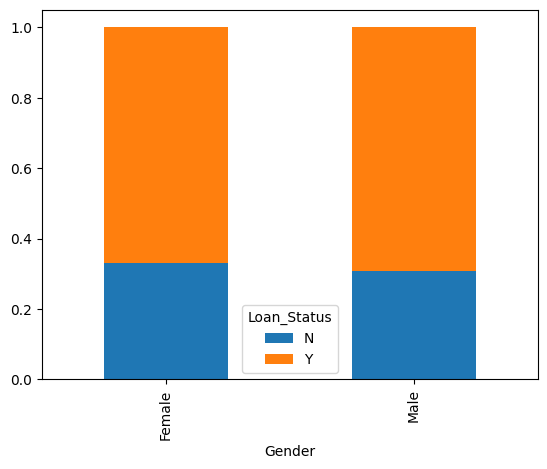

In [22]:
Gender= pd.crosstab(df['Gender'], df['Loan_Status'], normalize = 'index')
print(Gender)
Gender.plot(kind='bar', stacked=True)

Does the Gender affect the acceptance of the Loan?

**[Yes, gender appears to affect loan acceptance, with a higher percentage of male applicants being approved compared to female applicants
]**  

Do the same with Credit_history and Loan_Status

Loan_Status            N         Y
Credit_History                    
0.0             0.921348  0.078652
1.0             0.204211  0.795789


<Axes: xlabel='Credit_History'>

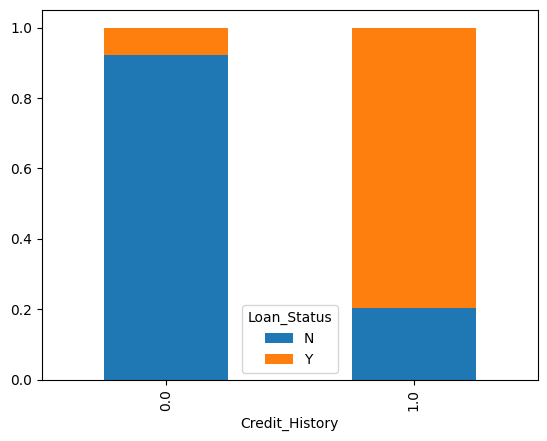

In [23]:
Credit_History= pd.crosstab(df['Credit_History'], df['Loan_Status'], normalize = 'index')
print(Credit_History)
Credit_History.plot(kind='bar', stacked=True)

Does the Credit History affect the acceptance of the Loan?

**[Credit History does affect the acceptance of the loan, with applicants having a positive credit history much more likely to receive a loan approval]**

Do the same with Dependents and Loan_Status

Loan_Status         N         Y
Dependents                     
0            0.310145  0.689855
1            0.352941  0.647059
2            0.247525  0.752475
3+           0.352941  0.647059


<Axes: xlabel='Dependents'>

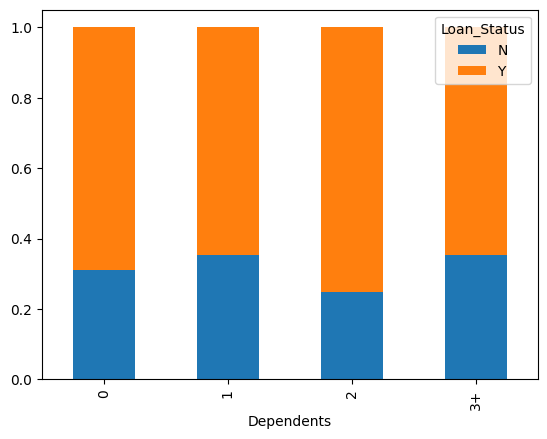

In [24]:
Dependents= pd.crosstab(df['Dependents'], df['Loan_Status'], normalize = 'index')
print(Dependents)
Dependents.plot(kind='bar', stacked=True)

Does the number of dependents affect the acceptance of the Loan?

**[yes, for example:Dependent(0) the percentage for rejected=30%, accepted=69% and Dependent(1) the percentage for rejected=38%, accepted=61% and so on, so yes it affects]**


Do the same between Education and Loan_Status

Loan_Status          N         Y
Education                       
Graduate      0.291667  0.708333
Not Graduate  0.388060  0.611940


<Axes: xlabel='Education'>

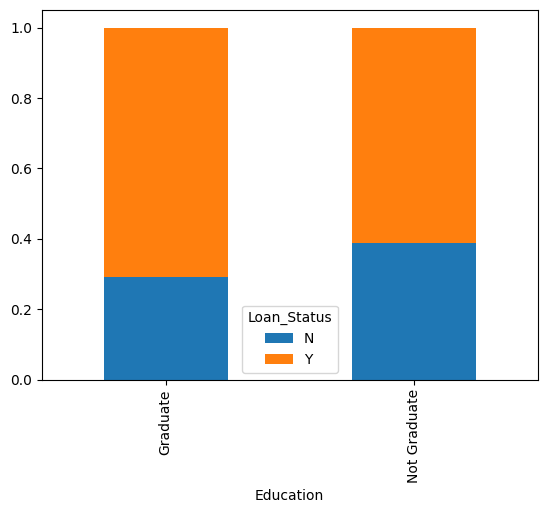

In [25]:
Education= pd.crosstab(df['Education'], df['Loan_Status'], normalize = 'index')
print(Education)
Education.plot(kind='bar', stacked=True)

Does the level of education affect the acceptance of the Loan?

**[Yes, Education affect loan acceptance, with Graduate applicants having a significantly higher approval rate (70.8%) compared to Not Graduate applicants (62.9%). ]**

Do the same between Married and Loan_Status

Loan_Status         N         Y
Married                        
No           0.370892  0.629108
Yes          0.283920  0.716080


<Axes: xlabel='Married'>

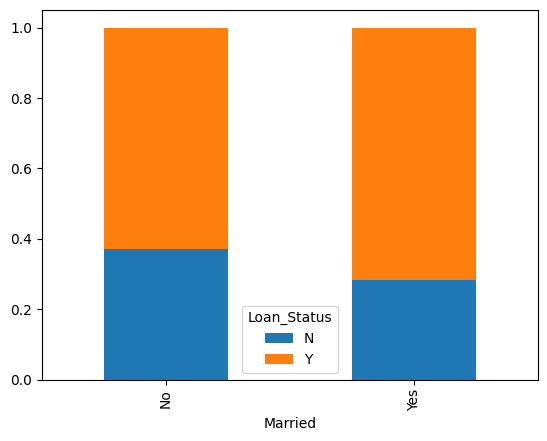

In [26]:
Married= pd.crosstab(df['Married'], df['Loan_Status'], normalize = 'index')
print(Married)
Married.plot(kind='bar', stacked=True)

Does the marriage affect the acceptance of the Loan?

**[Yes,  For Not Married: 63.89% of them had their loan accepted.
For Married: 71.82% of them had their loan accepted.]**  


Do the same between Property_Area and Loan_Status

Loan_Status           N         Y
Property_Area                    
Rural          0.385475  0.614525
Semiurban      0.231760  0.768240
Urban          0.341584  0.658416


<Axes: xlabel='Property_Area'>

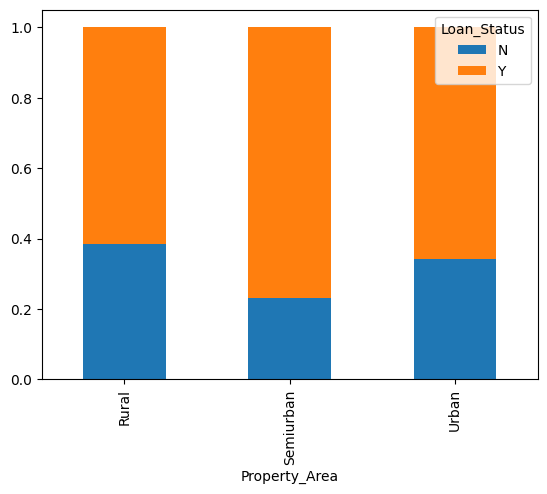

In [27]:
Property_Area= pd.crosstab(df['Property_Area'], df['Loan_Status'], normalize = 'index')
print(Property_Area)
Property_Area.plot(kind='bar', stacked=True)

Does the Property Area affect the acceptance of the Loan?

**[Yes, the Property Area to affect loan acceptance, as there are noticeable differences in approval rates across the different property areas.]**

Do the same between Self_Employed and Loan_Status

Loan_Status           N         Y
Self_Employed                    
No             0.314000  0.686000
Yes            0.317073  0.682927


<Axes: xlabel='Self_Employed'>

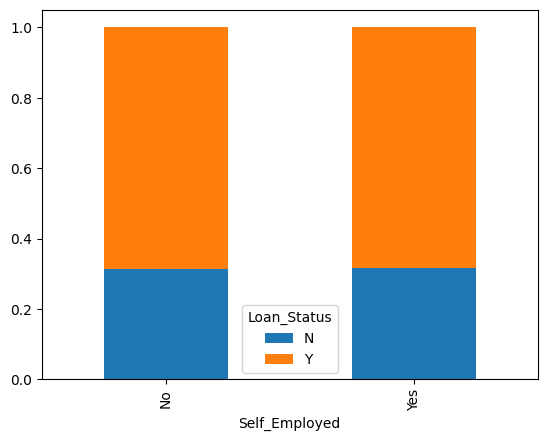

In [28]:
Self_Employed= pd.crosstab(df['Self_Employed'], df['Loan_Status'], normalize = 'index')
print(Self_Employed)
Self_Employed.plot(kind='bar', stacked=True)

Does the Self Employed Property affect the acceptance of the Loan?

**[Yes]**

Plot a Scatter Plot between Loan_Status and:
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* LoanAmount_Term

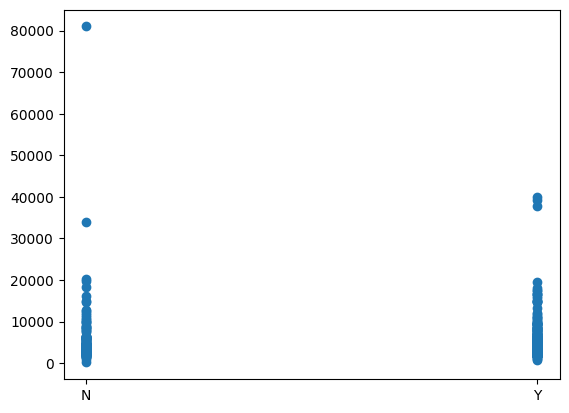

In [29]:
plt.scatter(removeNA_df['Loan_Status'] , removeNA_df['ApplicantIncome'])


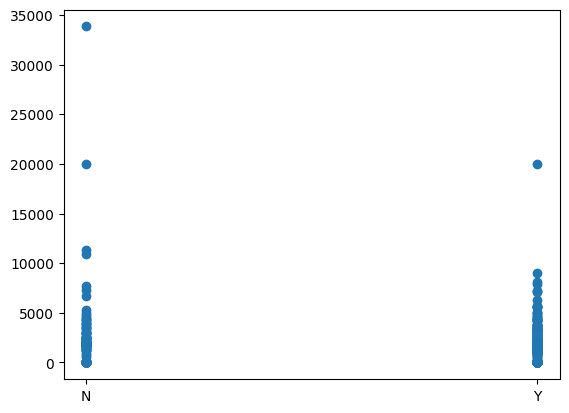

In [30]:
plt.scatter(removeNA_df['Loan_Status'] , removeNA_df['CoapplicantIncome'])

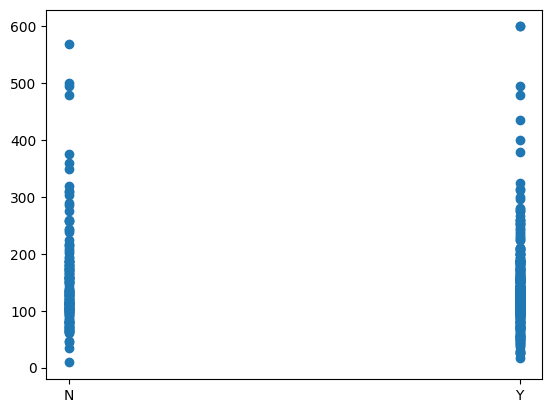

In [31]:
plt.scatter(removeNA_df['Loan_Status'] , removeNA_df['LoanAmount'])

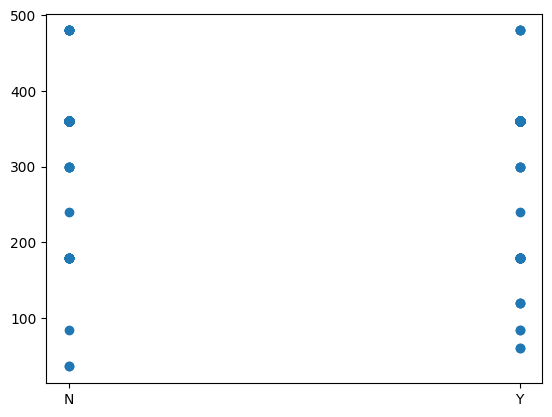

In [32]:
plt.scatter(removeNA_df['Loan_Status'] , removeNA_df['Loan_Amount_Term'])

Do you think these scatter plots gave you valuable information about the Loan_Status?

**[No]**

Group your dataframe by Loan_Status on the median Value

In [33]:
df.groupby('Loan_Status').median(numeric_only=True)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,129.0,360.0,1.0
Y,3812.5,1239.5,126.0,360.0,1.0


What did you deduce?

**[It shows that having a coapplicant income is a key differentiator for loan approval, while income, loan amount, and loan term do not show significant differences between approved and rejected loans, and credit history is generally positive for both groups.]**

# 4. Preprocessing
"Garbage in, garbage out".
<br>
<br>
Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove grabage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: standarize data ranges for all features (e.g., between 0 and 1)

## Remove unused columns

Remove the features that do not contribute to the prediction of the loan status

In [34]:
df.drop(['Loan_ID', 'Gender', 'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], inplace=True, axis=1)


## Remove grabage data

If you go back to one of the EDA steps where you saw the unique values of Dependents, you can see that you have '3+' as a value. In order to make the algorithm learn from such information, you have to replace this with a number. We will replace it by 3.

In [35]:
df.Dependents= df.Dependents.replace({'3+': '3'})

##Convert continuous data into categorical

Search for the feature that is contionuous but should be categorical and convert it

In [41]:
df['Credit_History'] = df['Credit_History'].astype('O')

## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continuous data with mean


In [44]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)


<ipython-input-44-2731dfc449a5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
<ipython-input-44-2731dfc449a5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

## Check if any null value exist

In [45]:
df.isnull().sum().any()

False

## Encode categorical data

Go over your categorical features and encode them (change their values to be numerical to be able to feed them to an algorithm and get a model in the end)

In [49]:
le = LabelEncoder()
cat_data = df[['Credit_History','Dependents', 'Education','Married', 'Property_Area', 'Loan_Status' ]]
num_data = df[['CoapplicantIncome']]
cat_data.head()

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status
0,1.0,0,Graduate,No,Urban,Y
1,1.0,1,Graduate,Yes,Rural,N
2,1.0,0,Graduate,Yes,Urban,Y
3,1.0,0,Not Graduate,Yes,Urban,Y
4,1.0,0,Graduate,No,Urban,Y


In [51]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

cat_data.head()

<ipython-input-51-8eac8d18b279>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i] = le.fit_transform(cat_data[i])
<ipython-input-51-8eac8d18b279>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i] = le.fit_transform(cat_data[i])
<ipython-input-51-8eac8d18b279>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status
0,1,0,0,0,2,1
1,1,1,0,1,0,0
2,1,0,0,1,2,1
3,1,0,1,1,2,1
4,1,0,0,0,2,1


In [52]:
df = pd.concat([cat_data, num_data], axis=1)
df.head()

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status,CoapplicantIncome
0,1,0,0,0,2,1,0.0
1,1,1,0,1,0,0,1508.0
2,1,0,0,1,2,1,0.0
3,1,0,1,1,2,1,2358.0
4,1,0,0,0,2,1,0.0


## Normalization

Normalize data ranges for all features (e.g., between 0 and 1)
First compute the maximum of each feature, and then divide each column by its maximum. After it, describe the data

In [54]:
df_max = df.max()
df = df.divide(df_max)
df.describe()

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status,CoapplicantIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.468241,0.248100,0.218241,0.653094,0.518730,0.687296,0.038910
std,0.235962,0.336541,0.413389,0.476373,0.393741,0.463973,0.070229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,0.000000,1.000000,0.500000,1.000000,0.028524
75%,0.500000,0.333333,0.000000,1.000000,1.000000,1.000000,0.055134
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Training & Validating

Create a variable x for the inputs (Fetaures), and a variable y for the output ('Loan_Status')
Then, split the data between training (70%) and testing (30%).

In [56]:
input_variables = ['Credit_History','Dependents', 'Education','Married', 'Property_Area', 'CoapplicantIncome']
output_variable = 'Loan_Status'

X = df[input_variables]
y = df[output_variable]

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

##Creating & Fitting the model

Create a Logistic Regression Model, and fit it on the training data you have

In [57]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

##Validating the model

Validate your model on the testing data, and compute the accuracy score of your predictions

In [58]:
pred_val = model.predict(x_val)
accuracy_score(y_val, pred_val)

0.8108108108108109

#7. Feature Importance

Evaluate the feature importance in your resulting model, and plot it

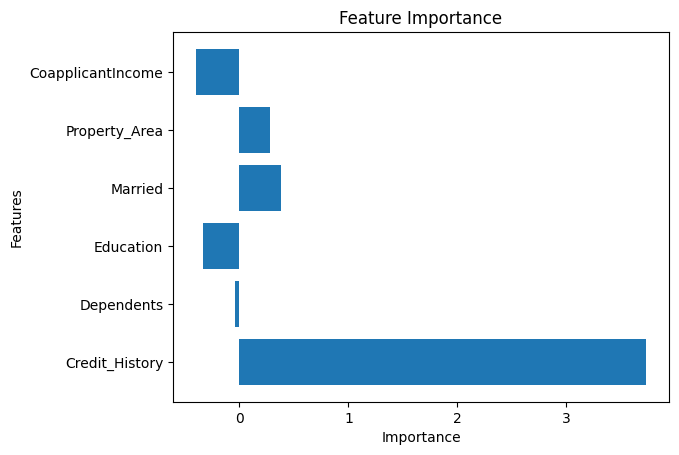

In [59]:
columns_name = x_train.columns.values
feature_importance = model.coef_
f = feature_importance.flatten()
plt.barh(columns_name, f)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

What's the most important feature?

**[Credit_History]**